<a href="https://colab.research.google.com/github/gilbertalgordo/alphazero-plugin-/blob/master/templates/aistudio_gemini_prompt_freeform_b64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 Google LLC

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Setup

### Install & import

In [ ]:
!pip install -U -q google-generativeai

In [ ]:
# Install the client library and import necessary modules.
import google.generativeai as genai

import base64
import io
import json
import mimetypes
import pathlib
import pprint
import requests

import PIL.Image
import IPython.display
from IPython.display import Markdown

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

## Set the API key

Add your API_KEY to the secrets manager in the left panel "🔑".

In [ ]:
from google.colab import userdata

API_KEY=userdata.get('API_KEY')

In [ ]:
# Configure the client library by providing your API key.
genai.configure(api_key=API_KEY)

### Parse the arguments

In [ ]:
model = 'gemini-1.5-pro-latest' # @param {isTemplate: true}
contents_b64 = 'W3sicGFydHMiOltdfV0=' # @param {isTemplate: true}
generation_config_b64 = 'eyJ0ZW1wZXJhdHVyZSI6MSwidG9wX3AiOjAuOTUsInRvcF9rIjo2NCwibWF4X291dHB1dF90b2tlbnMiOjgxOTIsInN0b3Bfc2VxdWVuY2VzIjpbXSwicmVzcG9uc2VfbWltZV90eXBlIjoiYXBwbGljYXRpb24vanNvbiJ9' # @param {isTemplate: true}
safety_settings_b64 = 'W3siY2F0ZWdvcnkiOiJIQVJNX0NBVEVHT1JZX0hBUkFTU01FTlQiLCJ0aHJlc2hvbGQiOiJCTE9DS19NRURJVU1fQU5EX0FCT1ZFIn0seyJjYXRlZ29yeSI6IkhBUk1fQ0FURUdPUllfSEFURV9TUEVFQ0giLCJ0aHJlc2hvbGQiOiJCTE9DS19NRURJVU1fQU5EX0FCT1ZFIn0seyJjYXRlZ29yeSI6IkhBUk1fQ0FURUdPUllfU0VYVUFMTFlfRVhQTElDSVQiLCJ0aHJlc2hvbGQiOiJCTE9DS19NRURJVU1fQU5EX0FCT1ZFIn0seyJjYXRlZ29yeSI6IkhBUk1fQ0FURUdPUllfREFOR0VST1VTX0NPTlRFTlQiLCJ0aHJlc2hvbGQiOiJCTE9DS19NRURJVU1fQU5EX0FCT1ZFIn1d' # @param {isTemplate: true}

contents = json.loads(base64.b64decode(contents_b64))
generation_config = json.loads(base64.b64decode(generation_config_b64))
safety_settings = json.loads(base64.b64decode(safety_settings_b64))

stream = False

In [ ]:
contents

[{'parts': [{'text': "what's in this picture:"},
   {'image': {'image_url': 'https://storage.googleapis.com/generativeai-downloads/images/scones.jpg'}}]}]

In [ ]:
generation_config

{}

In [ ]:
safety_settings

{}

### Load image data from Drive-IDs

In [ ]:
for content in contents:
  for n, part in enumerate(content['parts']):
    if image:=part.get('image', None):
      if drive_id:=image.get('drive_id', None):
        path = next(pathlib.Path(f'/gdrive/.shortcut-targets-by-id/{drive_id}').glob('*'))
        data = path.read_bytes()
        mime_type, _ = mimetypes.guess_type(path)
      elif image_url:=image.get('image_url', None):
        response = requests.get(image_url)
        data = response.content
        mime_type = response.headers['content-type']
      else:
        raise ValueError('Either drive_id or image_url must be provided.')

      if mime_type is None:
        # Guess!
        mime_type = 'image/png'

      blob = {'data': data, 'mime_type': mime_type}
      content['parts'][n] = {'inline_data': blob}

what's in this picture:


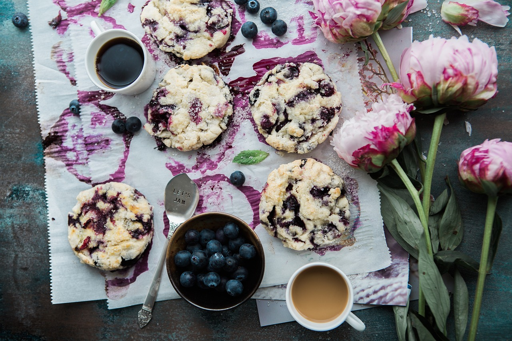

________________________________________________________________________________


In [ ]:
import IPython.display
import PIL.Image
import io

for content in contents:
    for part in content['parts']:
        if text := part.get('text', None):
            print(text)
        elif data := part.get('inline_data', None):
            img = PIL.Image.open(io.BytesIO(data['data']))
            img.thumbnail([512,512])
            IPython.display.display(img)
    print('_'*80)


### Call the API

In [ ]:
# Call the model and print the response.
gemini = genai.GenerativeModel(model_name=model)

response = gemini.generate_content(
    contents,
    generation_config=generation_config,
    safety_settings=safety_settings,
    stream=False)

In [ ]:
if generation_config.get('candidate_count', 1) == 1:
  display(Markdown(response.text))
else:
  print(response.candidates)

 There are some scones with blueberries, a bowl of blueberries, two cups of coffee, and some pink flowers.

In [ ]:
response.candidates

[index: 0
content {
  parts {
    text: " There are some scones with blueberries, a bowl of blueberries, two cups of coffee, and some pink flowers."
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}